## Using PennyLane QAOA

In [2]:
import pennylane as qml
from pennylane import qaoa
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

#### Introduction

**1. Defining circuits in terms of Hamiltonians.**

Oftentimes, when considering thinking of quantum circuits or variational ansatzae, it is convenient to consider these processes as defined by a series of quantum gates. However, as it turns out, there are many instances where it is useful to think of a quantum circuit in terms of a *Hamiltonian*. For instance, in quantum mechanics, a unitary transformation of great interest is that of time-evolution:

$$U \ = \ e^{-i \hat{H} t / \hbar}$$

This unitary is clearly defined completely in terms of a Hamiltonian, $\hat{H}$ and a scalar $t$. Mimicing the general form of the time-evolution unitary, as it is the most general example of a unitary determined by a Hamiltonian, we define a time-evolution template in PennyLane, more specifically, an *approximate* time-evolution template, which implements a unitary of the form:

$$U(\hat{H}, t, n) \ = \ \displaystyle\prod_{j \ = \ 1}^{n} \displaystyle\prod_{k} e^{-i \hat{H}_k t}$$

where:

$$\hat{H} \ = \ \displaystyle\sum_{k} \hat{H}_k$$

**2. Repeating/layering quantum circuits.**

Another fundamental idea within quantum computation is repetedly applictions of quantum gates. This can be seen everywhere, from amplitude amplification in Grover's algorithm and HHL, to layers in quantum neural networks, to Trotterization in quantum simulation. We therefore define the ``qml.layer`` method in PennyLane to alternate an arbitrary unitary. This general method allows us to take a function containing quantum operations, a template, or even a single quantum gate and repeatedly apply it. For example, consider the following complicated

### The Quantum Approximate Optimization Algorithm

The QAOA is a variational quantum algorithm, meaning that it uses a parametrized ansatz to prepare a state, with a classical optimizer minimizing the expected value of some cost Hamiltonian with respect to the prepared state. Consider the general form of the QAOA ansatz:

$$U_{\text{QAOA}}(\boldsymbol\gamma, \ \boldsymbol\alpha) \ = \ e^{-i \alpha_k H_M} e^{-i \gamma_k H_C} \ ... \ e^{-i \alpha_1 H_M} e^{-i \gamma_1 H_C}$$

This ansatz combines the two general principles that we discussed earlier: circuits determined by Hamiltonians and repetition. Therefore, many of the methods we introduce in this next section will simply be specific instances of the more general functions outlined previously.

### Finding a Minimum Vertex Cover with QAOA

We can now demonstrate the power of the PennyLane QAOA functionality by using it to solve a problem: finding the minimum vertex cover of a graph.
    
A vertex cover is defined as a collection of vertices within a graph, such that each edge in the graph has at least one of the vertices in the cover as an endpoint. We wish to find the vertex cover that consists of the fewest possible vertices of the graph.

<center>
    <figure>
    <img src="assets/minvc.png" style="height:200px;">
        <figcaption>The minimum vertex cover of a simple graph</figcaption>
    </figure>
</center>

We begin by defining a graph, of which we want to determine the minimum vertex cover. We choose the following, $4$-node graph:

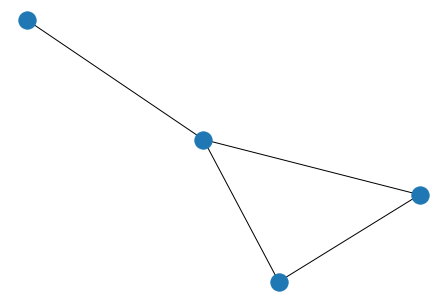

In [3]:
# Defines the graph
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

# Draws the graph
nx.draw(graph)
plt.show()

With the graph defined, we now create the cost and mixer Hamiltonians we will use to perform QAOA:

In [8]:
# Creates the cost and mixer Hamiltonians
cost_h, mixer_h = qaoa.min_vertex_cover(graph)

This then allows us to create a layer of the QAOA circuit:

<center>
    <img src="assets/layer.png" style="height:200px;">
</center>

In [7]:
# Creates a layer of the QAOA ansatz
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

We can then create the full QAOA ansatz by initializing our wires, and repeatedly applying the QAOA layer:

In [11]:
# Defines the device
dev = qml.device('qulacs.simulator', wires=len(wires))

# Defines the full QAOA circuit
def circuit(params):
    
    for w in wires:
        qml.Hadamard(wires=w) 

    qml.layer(qaoa_layer, 2, params[0], params[1])

NameError: name 'wires' is not defined

In [12]:
# Defines the QAOA cost function
cost_function = qml.VQECost(circuit, cost_h, dev)

NameError: name 'dev' is not defined